## Analysis of stratified drug response regression

In [1]:
import os
import sys

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import upsetplot as up

import pancancer_evaluation.config as cfg
import pancancer_evaluation.utilities.analysis_utilities as au

%load_ext autoreload
%autoreload 2

### Load results and look at overall performance

In [2]:
# analysis of results generated by script:
# 01_stratified_classification/run_stratified_classification.py
# (with varying feature_selection parameters)

results_dir = os.path.join('results', 'drug_response_stratified_regression')

n_dims = [100, 250, 500, 1000, 5000]

fs_methods = [
    'mad',
    'pancan_f_test',
    'median_f_test',
    'random'
]

In [3]:
results_df = au.load_prediction_results_fs(results_dir,
                                           cfg.fs_methods,
                                           classify=False,
                                           identifier_from_fname=True)

for n in n_dims:
    for fs_method in fs_methods:
        results_df.loc[
            (results_df.fs_method == fs_method) & 
            (results_df.n_dims == n),
            'fs_method'
        ] = '{}.{}'.format(fs_method, n)

results_df = (results_df
  .rename(columns={'identifier': 'drug',
                   'fold_no': 'fold'})
)

print(results_df.shape)
print(results_df.fs_method.unique())
print(results_df.n_dims.unique())
results_df.head()

(6720, 12)
['mad.100' 'median_f_test.5000' 'random.5000' 'random.100' 'mad.5000'
 'mad.500' 'pancan_f_test.5000' 'pancan_f_test.500' 'median_f_test.250'
 'random.500' 'pancan_f_test.1000' 'mad.1000' 'random.1000'
 'median_f_test.500' 'random.250' 'median_f_test.100' 'pancan_f_test.250'
 'median_f_test.1000' 'pancan_f_test.100' 'mad.250']
[ 100 5000  500  250 1000]


,mse,rmse,r2,pearson,spearman,data_type,drug,signal,seed,fold,fs_method,n_dims
0,0.76528,0.8748,0.421010,0.691810,0.575760,train,Erlotinib,signal,42,0,mad.100,100
1,1.27950,1.1312,0.031952,0.255210,0.212880,cv,Erlotinib,signal,42,0,mad.100,100
2,1.25210,1.1190,-0.134980,0.070271,-0.115760,test,Erlotinib,signal,42,0,mad.100,100
3,1.01630,1.0081,0.108920,0.444040,0.368330,train,Erlotinib,signal,42,1,mad.100,100
4,1.12940,1.0627,0.009795,0.106700,0.088594,cv,Erlotinib,signal,42,1,mad.100,100


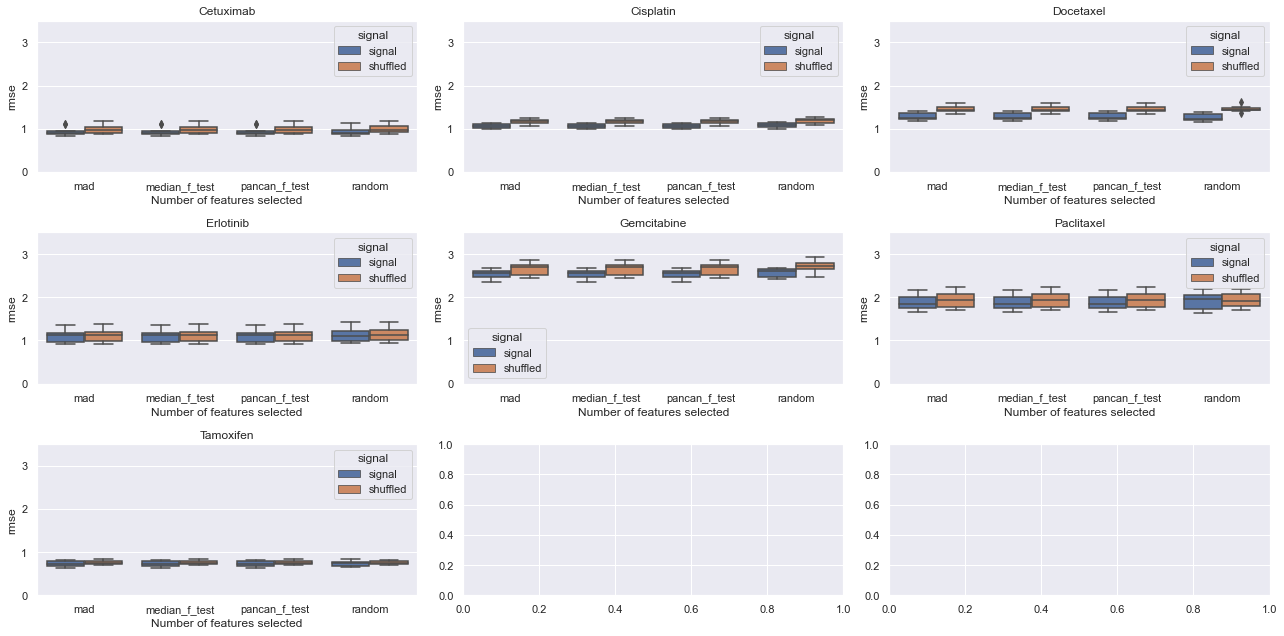

In [4]:
sns.set({'figure.figsize': (18, 9)})
sns.set_context('notebook')

fig, axarr = plt.subplots(3, 3)

n_dims = 1000
fs_method_order = [
    'mad',
    'pancan_f_test',
    'median_f_test',
    'random'
]
signal_order = ['signal', 'shuffled']

results_df.sort_values(by=['drug', 'fs_method'], inplace=True)
for ix, drug in enumerate(results_df.drug.unique()):
    ax = axarr[ix // 3, ix % 3]
    plot_df = results_df[(results_df.drug == drug) &
                         (results_df.n_dims == n_dims) &
                         (results_df.data_type == 'test')].copy()
    plot_df.loc[:, 'fs_method'] = plot_df.fs_method.str.split('.', 1, expand=True)[0]
    sns.boxplot(data=plot_df, x='fs_method', y='rmse',
                hue='signal', hue_order=signal_order,
                ax=ax)
    ax.set_title(drug)
    ax.set_xlabel('Number of features selected')
    ax.set_ylim(0, 3.5)

plt.tight_layout()

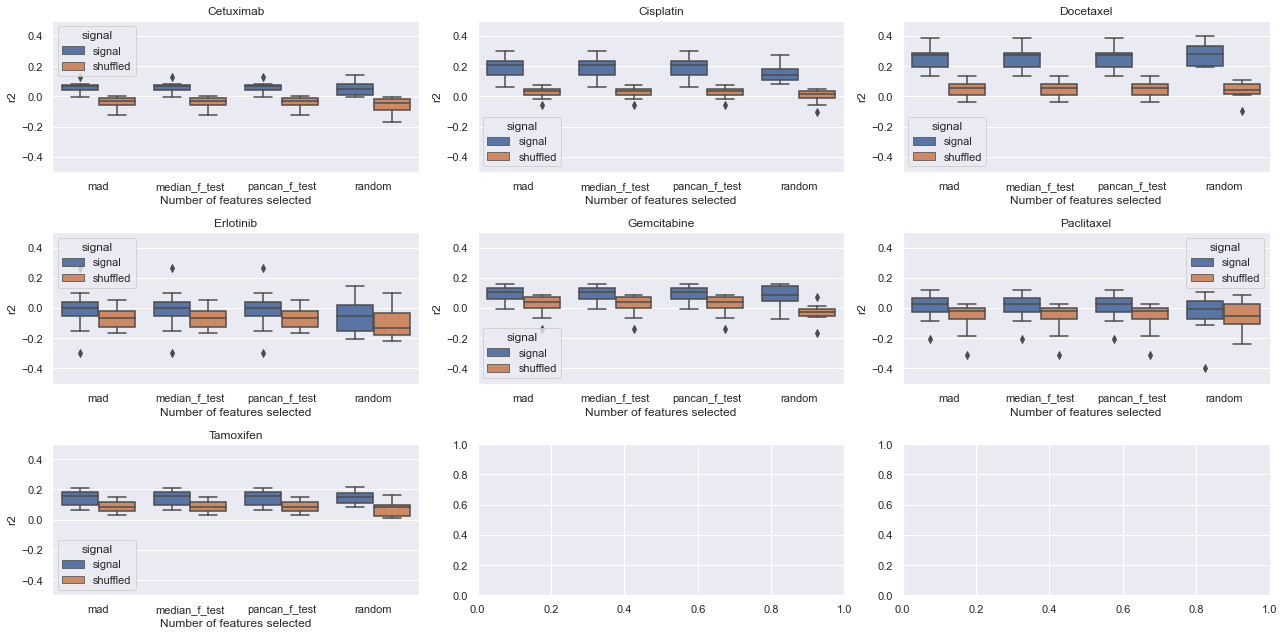

In [5]:
sns.set({'figure.figsize': (18, 9)})
sns.set_context('notebook')

fig, axarr = plt.subplots(3, 3)

results_df.sort_values(by=['drug', 'fs_method'], inplace=True)
for ix, drug in enumerate(results_df.drug.unique()):
    ax = axarr[ix // 3, ix % 3]
    plot_df = results_df[(results_df.drug == drug) &
                         (results_df.n_dims == n_dims) &
                         (results_df.data_type == 'test')].copy()
    plot_df.loc[:, 'fs_method'] = plot_df.fs_method.str.split('.', 1, expand=True)[0]
    sns.boxplot(data=plot_df, x='fs_method', y='r2',
                hue='signal', hue_order=signal_order,
                ax=ax)
    ax.set_title(drug)
    ax.set_xlabel('Number of features selected')
    ax.set_ylim(-0.5, 0.5)

plt.tight_layout()

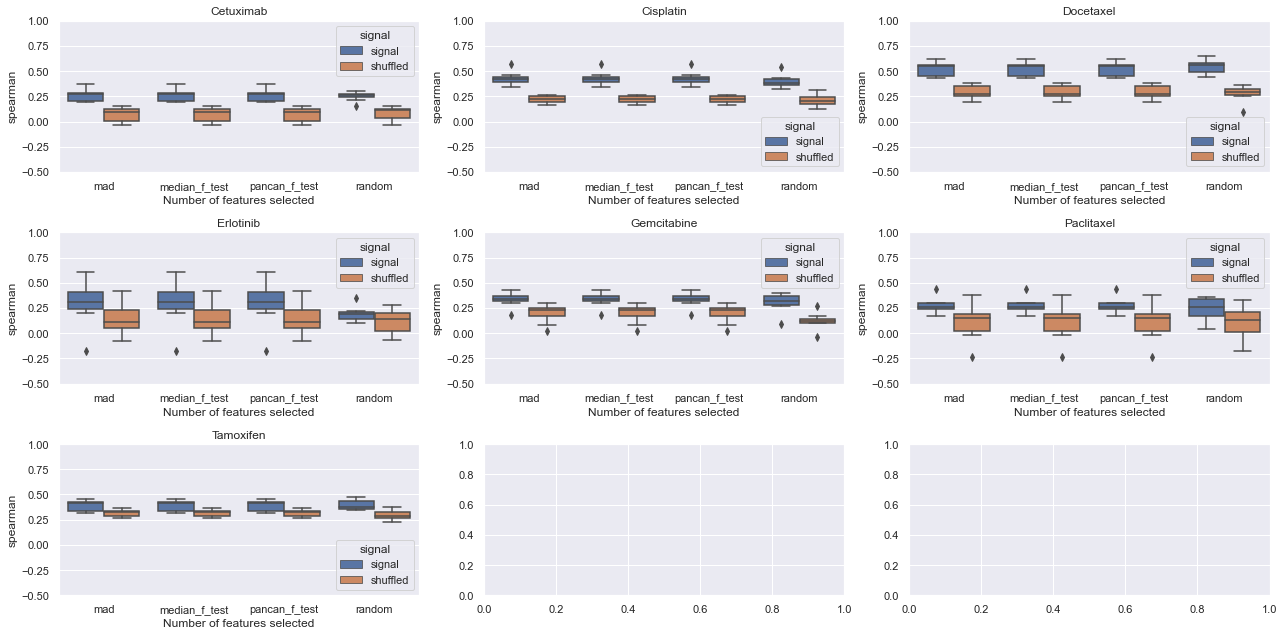

In [6]:
sns.set({'figure.figsize': (18, 9)})
sns.set_context('notebook')

fig, axarr = plt.subplots(3, 3)

results_df.sort_values(by=['drug', 'fs_method'], inplace=True)
for ix, drug in enumerate(results_df.drug.unique()):
    ax = axarr[ix // 3, ix % 3]
    plot_df = results_df[(results_df.drug == drug) &
                         (results_df.n_dims == n_dims) &
                         (results_df.data_type == 'test')].copy()
    plot_df.loc[:, 'fs_method'] = plot_df.fs_method.str.split('.', 1, expand=True)[0]
    sns.boxplot(data=plot_df, x='fs_method', y='spearman',
                hue='signal', hue_order=signal_order,
                ax=ax)
    ax.set_title(drug)
    ax.set_xlabel('Number of features selected')
    ax.set_ylim(-0.5, 1.0)

plt.tight_layout()

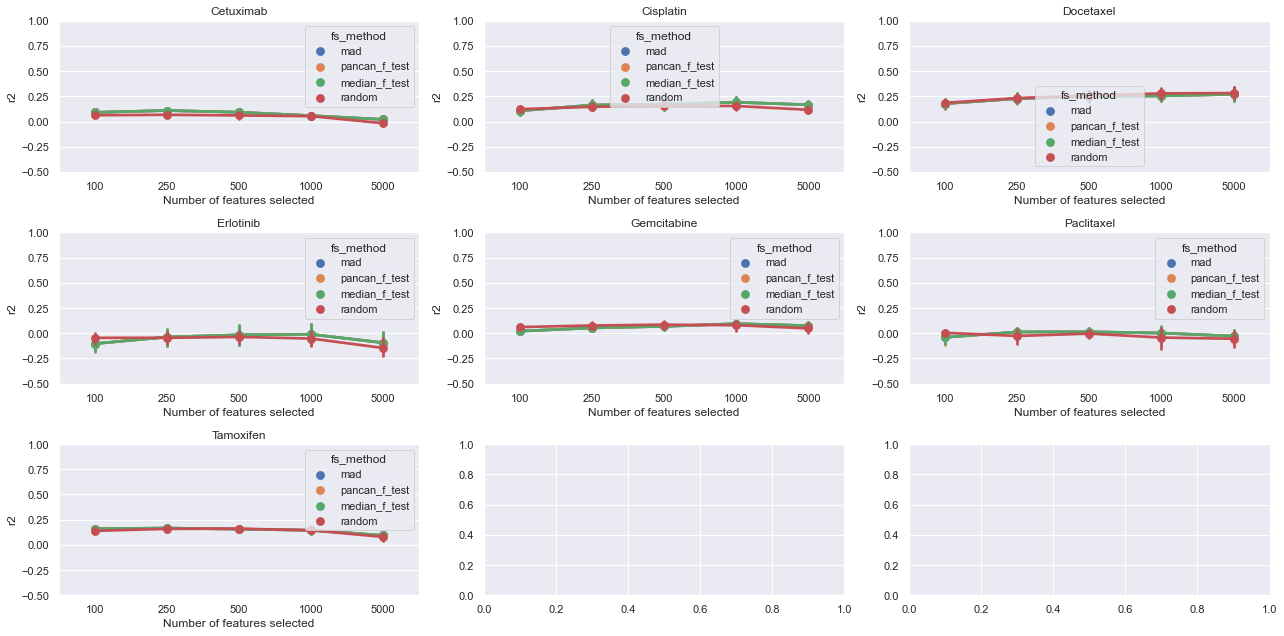

In [7]:
sns.set({'figure.figsize': (18, 9)})
sns.set_context('notebook')

fig, axarr = plt.subplots(3, 3)

results_df.sort_values(by=['drug', 'fs_method'], inplace=True)
for ix, drug in enumerate(results_df.drug.unique()):
    ax = axarr[ix // 3, ix % 3]
    plot_df = results_df[(results_df.drug == drug) &
                         (results_df.signal == 'signal') &
                         (results_df.data_type == 'test')].copy()
    plot_df.loc[:, 'fs_method'] = plot_df.fs_method.str.split('.', 1, expand=True)[0]
    sns.pointplot(data=plot_df, x='n_dims', y='r2',
                  hue='fs_method', hue_order=fs_method_order, ax=ax)
    ax.set_title(drug)
    ax.set_xlabel('Number of features selected')
    ax.set_ylim(-0.5, 1)

plt.tight_layout()

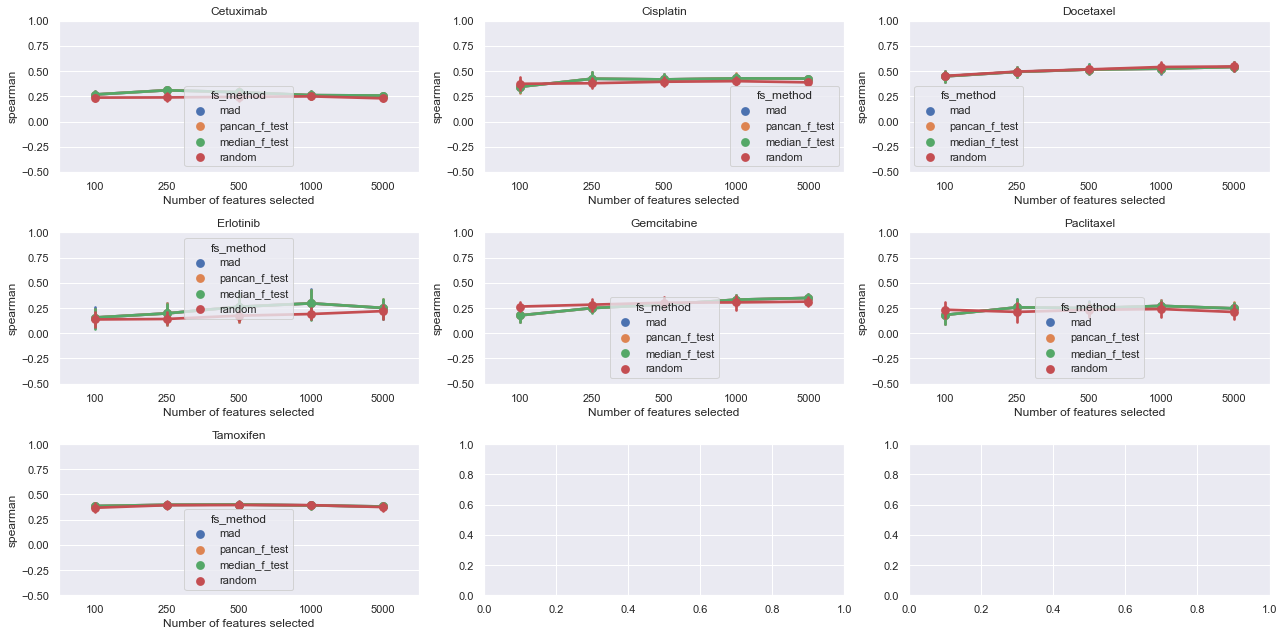

In [8]:
sns.set({'figure.figsize': (18, 9)})
sns.set_context('notebook')

fig, axarr = plt.subplots(3, 3)

results_df.sort_values(by=['drug', 'fs_method'], inplace=True)
for ix, drug in enumerate(results_df.drug.unique()):
    ax = axarr[ix // 3, ix % 3]
    plot_df = results_df[(results_df.drug == drug) &
                         (results_df.signal == 'signal') &
                         (results_df.data_type == 'test')].copy()
    plot_df.loc[:, 'fs_method'] = plot_df.fs_method.str.split('.', 1, expand=True)[0]
    sns.pointplot(data=plot_df, x='n_dims', y='spearman',
                  hue='fs_method', hue_order=fs_method_order, ax=ax)
    ax.set_title(drug)
    ax.set_xlabel('Number of features selected')
    ax.set_ylim(-0.5, 1)

plt.tight_layout()

In [9]:
# get difference between true and shuffled models, split by
# feature selection method
def compare_from_experiment(experiment_df):
    compare_df = []
    for fs_method in experiment_df.fs_method.unique():
        compare_df.append(
            au.compare_control_ind(
                experiment_df[
                    (experiment_df.fs_method == fs_method)
                ], identifier='drug', metric='spearman', verbose=True)
              .assign(fs_method=fs_method)
        )
    return pd.concat(compare_df)

compare_df = compare_from_experiment(results_df)

print(compare_df.shape)
compare_df.head()

(1120, 5)


,identifier,seed,fold,delta_spearman,fs_method
0,Cetuximab,1,0,0.229940,mad.100
1,Cetuximab,1,1,0.181070,mad.100
2,Cetuximab,1,2,0.094912,mad.100
3,Cetuximab,1,3,0.174077,mad.100
4,Cetuximab,42,0,0.251763,mad.100


In [10]:
compare_df[['fs_method', 'n_dims']] = compare_df.fs_method.str.split('.', 1, expand=True)
compare_df['n_dims'] = compare_df.n_dims.astype(int)

print(compare_df.fs_method.unique())
print(compare_df.n_dims.unique())
compare_df.head()

['mad' 'median_f_test' 'pancan_f_test' 'random']
[ 100 1000  250  500 5000]


,identifier,seed,fold,delta_spearman,fs_method,n_dims
0,Cetuximab,1,0,0.229940,mad,100
1,Cetuximab,1,1,0.181070,mad,100
2,Cetuximab,1,2,0.094912,mad,100
3,Cetuximab,1,3,0.174077,mad,100
4,Cetuximab,42,0,0.251763,mad,100


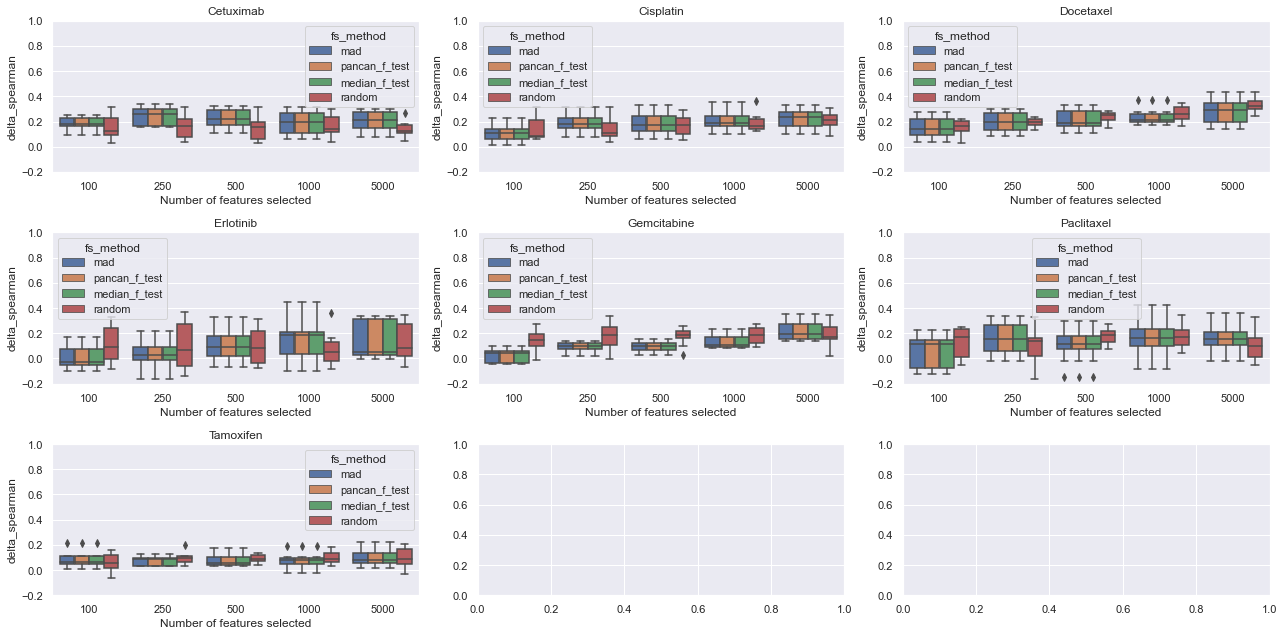

In [13]:
sns.set({'figure.figsize': (18, 9)})
sns.set_context('notebook')

fig, axarr = plt.subplots(3, 3)

fs_method_order = [
    'mad',
    'pancan_f_test',
    'median_f_test',
    'random'
]

for ix, drug in enumerate(compare_df.identifier.unique()):
    ax = axarr[ix // 3, ix % 3]
    plot_df = compare_df[compare_df.identifier == drug]
    sns.boxplot(data=plot_df, x='n_dims', y='delta_spearman',
                hue='fs_method', hue_order=fs_method_order, ax=ax)
    ax.set_title(drug)
    ax.set_xlabel('Number of features selected')
    ax.set_ylim(-0.2, 1)

plt.tight_layout()